# H04 - Eight schools

_Adapted from Josep Fortiana (2023-05-15) by Jordi Abante (2024-05-06)_

SAT Example: from Chapter 5 of [Gelman A, Carlin J, Stern H, Dunson D, Vehtari A, and Rubin D, _Bayesian Data Analysis, 3rd Ed._ **(BDA3)**](http://www.stat.columbia.edu/~gelman/book/), pp. 119-124.   
Also, we reproduce some portions from [Aki Vehtari's tutorial](https://github.com/avehtari/BDA_R_demos/tree/master/demos_ch5).

This is a _very_ classical benchmark example, a problem in which the Bayesian analysis gives conclusions that differ in important respects from other methods. 

See the personal account by Phil Price in Andrew Gelman's blog: [Everything I need to know about Bayesian statistics, I learned in eight schools.](https://statmodeling.stat.columbia.edu/2014/01/21/everything-need-know-bayesian-statistics-learned-eight-schools/) 

See also, however, the more recent entry -15 October 2019- in this same blog, by Dan Simpson: [A heart full of hatred: 8 schools edition,](https://statmodeling.stat.columbia.edu/2019/10/15/a-heart-full-of-hatred-8-schools-edition/)   

Why such hate on a classic?   

<figure>
<Center><img src="./Img/Walrus.jpg" alt="Walrus" style="width:30%">
<figcaption>The Horniman Walrus</figcaption></Center>
</figure>

[The Horniman Walrus](https://www.horniman.ac.uk/plan-your-visit/around-the-horniman/) is a somewhat peculiar specimen, characterized by being much smoother than the original animal ever was,    
because of overstuffing, apparently due to the Victorian taxidermist's ignorance about walrus's appearance, working only from the skin.

The analogy to benchmark classical examples becoming too smooth is the point Dan Simpson is trying to make in his post which, together with the ensuing discussion, is an entertaining and illuminating reading, particularly Andrew Gelman's inside story on the problem background.   

# The problem

A study was performed for the Educational Testing Service to analyze the effects of special coaching programs on test scores. 

Separate randomized experiments were performed to estimate the effects of coaching programs for the SAT-V (Scholastic Aptitude Test-Verbal) in each of eight high schools. 

The outcome variable in each study was the score on a special administration of the SAT-V, a standardized multiple choice test administered by the Educational Testing Service and used to help colleges make admissions decisions; the scores can vary between 200 and 800, with mean about 500 and standard deviation about 100. 

The SAT examinations are designed to be resistant to short-term efforts directed specifically toward improving performance on the test; instead they are designed to reflect knowledge acquired and abilities developed over many years of education. Nevertheless, each of the eight schools in this study considered its short-term coaching program to be successful at increasing SAT scores. 

Also, there was no prior reason to believe that any of the eight programs was more effective than any other or that some were more similar in effect to each other than to any other.
  
The relevant question is: Do different SAT training programs have a positive effect on SAT scores?

The results of the experiments are summarized below: 

Observed effects of special preparation on SAT-V scores in eight randomized experiments for the eight schools $A,B,C,D,E,F,G,H$.  
Vector $y$ contains the estimated treatment effect $y_{j}$ for each school, $\sigma$ contains the standard error $\sigma_{j}$ of each effect estimate.   
Estimates are based on separate analyses for the eight experiments.

All students in the experiments had already taken the PSAT (Preliminary SAT), and allowance was made for differences in the PSAT-M (Mathematics) and PSAT-V test scores between coached and uncoached students. 

In particular, in each school the estimated coaching effect and its standard error were obtained by an analysis of covariance adjustment (that is, a linear regression was performed of SAT-V on treatment group, using PSAT-M and PSAT-V as control variables) appropriate for a completely randomized experiment. A separate regression was estimated for each school. 

The estimates $y_{j}$ are obtained by independent experiments and have approximately normal sampling distributions with sampling variances that are known, for all practical purposes, because the sample sizes in all of the eight experiments were relatively large, over thirty students in each school. Incidentally, an increase of eight points on the SAT-V corresponds to about one more test item correct.

# The data set

In [1]:
J<-8
school=c("A","B","C","D","E","F","G","H")
y<-c(28, 8,-3, 7,-1, 1,18,12)
s<-c(15,10,16,11, 9,11,10,18)
rbind("School"= school,"Estimated treatment effect"=y,"Standard error of the estimate"=s)

School,A,B,C,D,E,F,G,H
Estimated treatment effect,28,8,-3,7,-1,1,18,12
Standard error of the estimate,15,10,16,11,9,11,10,18


# 01. Nonhierarchical models

Two simple nonhierarchical methods:

1. Separate estimates of the effects from the eight experiments independently, 
2. Complete pooling

Neither of these approaches is adequate. Why?

## 1. Separate estimates

A cursory examination of the Table may at first suggest that some coaching programs have moderate effects (in the range 18–28 points), most have small effects (0–12 points), and two have small negative effects; however, when we take note
of the standard errors of these estimated effects, we see that it is difficult statistically to distinguish between any of the experiments. 

For example, treating each experiment separately and applying the simple normal analysis in each yields 95% posterior intervals that all overlap substantially.

In [2]:
#install.packages("ggplot2")
#install.packages("gridExtra")
#install.packages("tidyr")
require(ggplot2)
require(gridExtra)
require(tidyr)

Loading required package: ggplot2

Loading required package: gridExtra

Loading required package: tidyr



Plot 8 normal pdf's with means $y$ and standard deviations $s$.

The `gather` in the second statement should be replaced with `pivot_longer`: it converts a data.frame with 500 observations of 9 variables:
`A`, ..., `H`,`x` to a "longer" data.frame with 4000 observations of 3 variables: `x`, `school`, `p`.

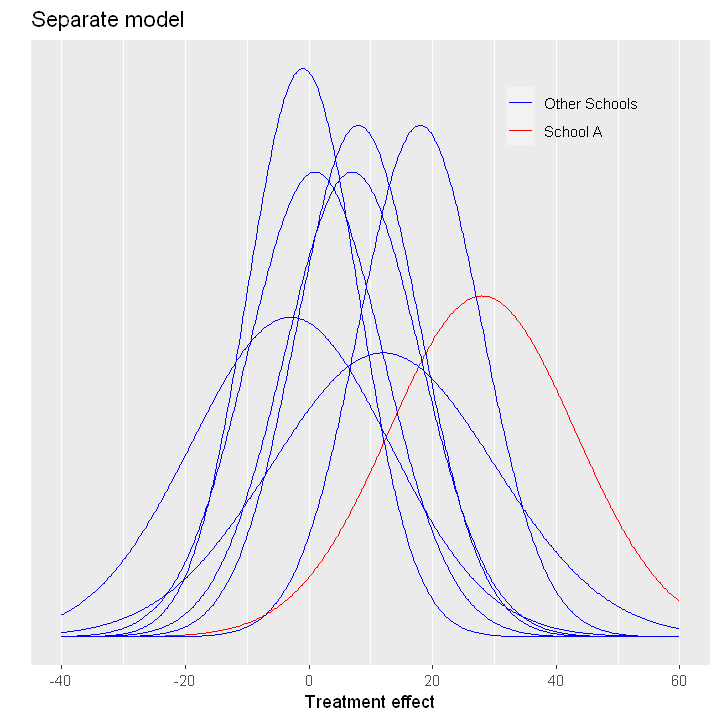

In [3]:
x <- seq(-40, 60, length.out = 500)
df_sep <- mapply(function(y, s, x) dnorm(x, y, s), y, s, MoreArgs = list(x = x)) %>%
  as.data.frame() %>% setNames(LETTERS[1:8]) %>% cbind(x) %>% gather(school, p, -x)
labs1 <- c('Other Schools', 'School A')
options(repr.plot.width=6,repr.plot.height=6)
plot_sep <- ggplot(data = df_sep) +
  geom_line(aes(x = x, y = p, color = (school=='A'), group = school)) +
  labs(x = 'Treatment effect', y = '', title = 'Separate model', color = '') +
  scale_y_continuous(breaks = NULL) +
  scale_color_manual(values = c('blue','red'), labels = labs1) +
  theme(legend.background = element_blank(), legend.position = c(0.8,0.9)) #+  fig.height=4
plot_sep

## 2. A pooled estimate. 

The general overlap in the posterior intervals based on independent analyses suggests that all experiments might be estimating the same quantity. 

Under the hypothesis that all experiments have the same effect and produce independent estimates of this common effect,   
we could treat the data as eight realizations of a same normal distribution with a pooled variance.

In [4]:
# Weighted average with precisions as weights - Formula (5.13) in BDA3
w<-1/s^2
y.dot.dot<-sum(w*y)/sum(w)
pooled.var<-1/sum(w)
pooled.sd<-sqrt(pooled.var)
round(y.dot.dot,3)
round(pooled.var,3)
round(pooled.sd,3)

[1] 7.686

[1] 16.581

[1] 4.072

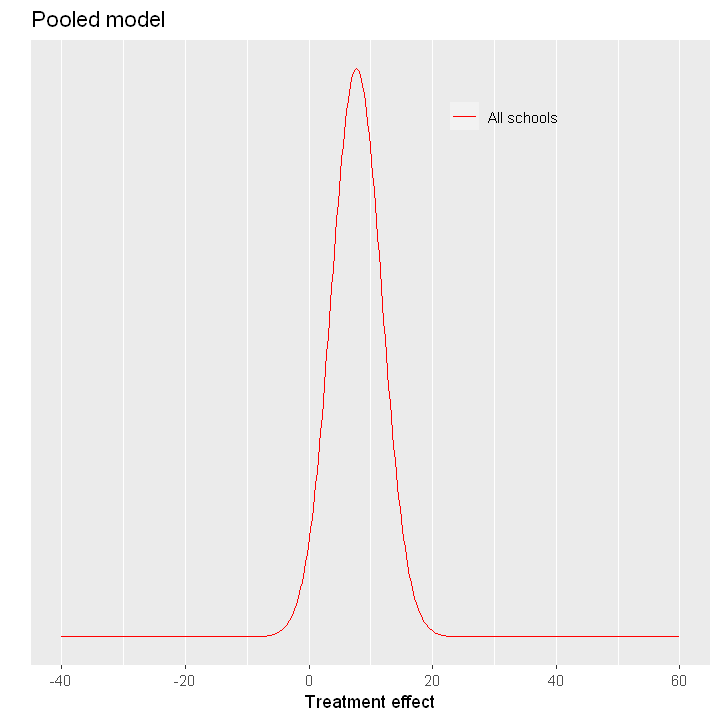

In [5]:
df_pool <- data.frame(x = x, p = dnorm(x, y.dot.dot,pooled.sd))
# Create plot for the pooled model
options(repr.plot.width=6,repr.plot.height=6)
plot_pool <- ggplot(data = df_pool) +
  geom_line(aes(x = x, y = p, color = '1')) +
  labs(x = 'Treatment effect', y = '', title = 'Pooled model', color = '') +
  scale_y_continuous(breaks = NULL) +
  scale_color_manual(values = 'red', labels = 'All schools') +
  theme(legend.background = element_blank(), legend.position = c(0.7,0.9))
plot_pool

# Using Stan

In [21]:
#install.packages("ggplot2",dependencies=TRUE,repos= "https://cloud.r-project.org")
#install.packages("StanHeaders",dependencies=TRUE,repos= "https://cloud.r-project.org")
#install.packages("rstan",dependencies=TRUE,repos= "https://cloud.r-project.org")
require(rstan)
options(mc.cores = parallel::detectCores())
rstan_options("auto_write" = TRUE)

Loading required package: rstan

Loading required package: StanHeaders


rstan version 2.26.13 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file


Attaching package: 'rstan'


The following object is masked from 'package:R2jags':

    traceplot


The following object is masked from 'package:coda':

    traceplot


The following object is masked from 'package:tidyr':

    extract




In [22]:
#install.packages("bayesplot",dependencies=TRUE,repos="https://cloud.r-project.org")
require(bayesplot)

## Data

In [23]:
J <- 8
y <- c(28,  8, -3,  7, -1,  1, 18, 12)
s <- c(15, 10, 16, 11,  9, 11, 10, 18)

## Stan model 01


1. The observed scores $y_{i}$ (`y[i]`) are drawn from normal distributions with means $\theta_{i}$ (`theta[i]`) and standard deviations $\sigma_{i}$, 

2. Each $i$-th school's individual effect $\theta_{i}$ (`theta[i]`) is drawn from a normal distribution with with mean equal to $\mu_{\theta}$ (`mu_theta`) and standard deviation $\sigma_{\theta}$ (`sigma_theta`), 

>**NB:** The reparameterization $\theta_{i}=\mu_{\theta}+\sigma_{\theta}\cdot\eta_{i}$, with $\eta_{i}\sim\operatorname{Normal}(0,1)$,   
instead of $\theta_{i}\sim\operatorname{Normal}(\mu_{\theta},\sigma_{\theta}^{2})$ which, from a Probability theory perspective are equivalent,   
is done to improve convergence of the HMC algorithm.

1. The mean training effect $\mu_{\theta}$ (`mu_theta`) is drawn from a noninformative mean zero normal distribution, with a large variance $=1.0\times 10^{6}$, 

2. The standard deviation $\sigma_{\theta}$ (`sigma_theta`) of the distribution of individual effects is drawn from a uniform distribution on a large (positive) interval,


$$
    \begin{array}{lcl}
            y_{i}          &\sim &\operatorname{Normal}(\theta_{i},\sigma_{i}),\mskip30mu 1\leq i\leq J,\\[0.35cm]
            \theta_{i}     &\sim &\operatorname{Normal}(\mu_{\theta},\sigma_{\theta}),
                                    \mskip30mu 1\leq i\leq J,\\[0.35cm]
                                &&\text{actually,}\\[0.35cm]
             \theta_{i}    &=    &\mu_{\theta}+\sigma_{\theta}\cdot\eta_{i},\mskip30mu\text{where}\\[0.35cm]
                    \eta_{i}&\sim &\operatorname{Normal}(0,1),\mskip30mu 1\leq i\leq J,\\[0.35cm]
            \mu_{\theta}   &\sim &\operatorname{Normal}(0,1000),\\[0.35cm]
            \sigma_{\theta}&\sim &\operatorname{Unif}(0,1000).
    \end{array}
$$

Notice that, in addition to the `parameters` statement, there is a `transformed parameters` statement, with the obvious meaning.

No explicit prior is given to $\sigma_{\theta}$, $\mu_{\theta}$, assuming Stan will provide noninformative ones.

In [24]:
schools.Stan.01.model<-"
    data{
        int<lower=0> J;         // number of schools 
        real y[J];              // estimated treatment effects
        real<lower=0> sigma[J]; // s.e. of effect estimates 
        }
    parameters{
        real mu_theta; 
        real<lower=0> sigma_theta;
        real eta[J];
        }
    transformed parameters{
        real theta[J];
        for (j in 1:J)
            theta[j] = mu_theta + sigma_theta * eta[j];
        }
    model{
        eta ~ normal(0, 1);           // vectorization allowed
        y ~ normal(theta, sigma);
        mu_theta ~ normal(0,1000);
        sigma_theta ~ uniform(0,1000);
        }
    " # close quote for modelString

## Translate model to C++ and compile to _Dynamic Shared Object (DSO)_

In [25]:
schools.Stan.01.stanDso<-stan_model(model_code=schools.Stan.01.model)

## Generate posterior sample

In [26]:
schools.Stan.01.data<-list(J=J,y=y,sigma=s)

In [27]:
schools.Stan.01.stanFit<-sampling(
        object=schools.Stan.01.stanDso, 
        data = schools.Stan.01.data, 
        chains = 4 ,
        iter = 2000 , 
        warmup = 500 , 
        thin = 1,
        control = list(adapt_delta = 0.99)
        )

In [28]:
schools.Stan.01.summary<-summary(schools.Stan.01.stanFit, probs=c(0.025,0.975))
Stan.01.S<-schools.Stan.01.summary$summary
round(Stan.01.S,3)

,mean,se_mean,sd,2.5%,97.5%,n_eff,Rhat
mu_theta,7.888,0.095,5.135,-1.998,18.121,2918.644,1.001
sigma_theta,6.598,0.118,5.559,0.233,20.605,2218.310,1.002
eta[1],0.409,0.012,0.930,-1.448,2.193,6259.541,1.000
eta[2],0.003,0.011,0.851,-1.663,1.713,5824.849,1.000
eta[3],-0.209,0.011,0.920,-1.955,1.622,7087.918,0.999
eta[4],-0.030,0.011,0.887,-1.791,1.737,6305.330,1.000
eta[5],-0.358,0.012,0.875,-2.051,1.432,5376.879,1.000
eta[6],-0.216,0.011,0.886,-1.943,1.571,6102.679,1.000
eta[7],0.332,0.012,0.900,-1.481,2.080,5244.209,1.000
eta[8],0.057,0.011,0.937,-1.795,1.921,7507.411,1.000


In [29]:
Stan.01.theta.mean<-Stan.01.S[11:18,1]
rbind(y=y,theta.01=round(Stan.01.theta.mean,2))

,theta[1],theta[2],theta[3],theta[4],theta[5],theta[6],theta[7],theta[8]
y,28.00,8.00,-3.0,7.00,-1.00,1.00,18.00,12.00
theta.01,11.45,7.87,6.1,7.61,5.04,6.18,10.66,8.38


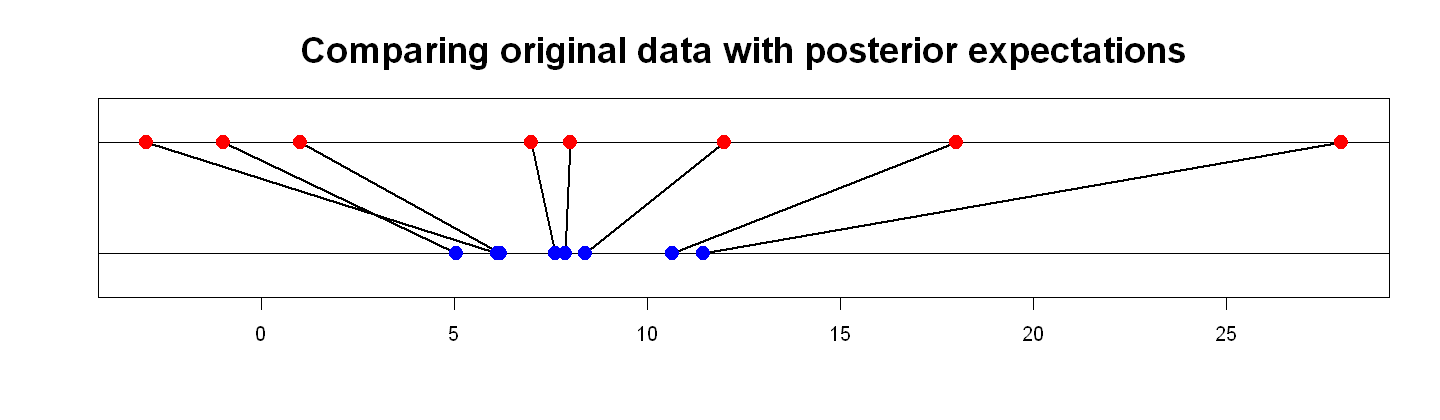

In [30]:
E<-y
F<-Stan.01.theta.mean
x.min<-min(c(E,F))
x.max<-max(c(E,F))
u<-sort(c(E,F))
z<-rep(0,length(u))
h0<-0.3
h1<--h0
z0<-rep(h0,length(E))
z1<-rep(h1,length(F))
options(repr.plot.width=12,repr.plot.height=3.5)
plot(u,z,"p",pch=19,col="white",ylim=c(-0.5,0.5),cex=0.2,ylab="",xlab="",yaxt="n",
    main="Comparing original data with posterior expectations",cex.main=1.8 )
for(i in 1:length(y)){
    lines(c(y[i],Stan.01.theta.mean[i]),c(h0,h1),col="black",lwd=2)
    }
abline(h=h0,lwd=0.5,col="black")
abline(h=h1,lwd=0.5,col="black")
points(E,z0,pch=19,col="red",cex=1.6)
points(F,z1,pch=19,col="blue",cex=1.6)

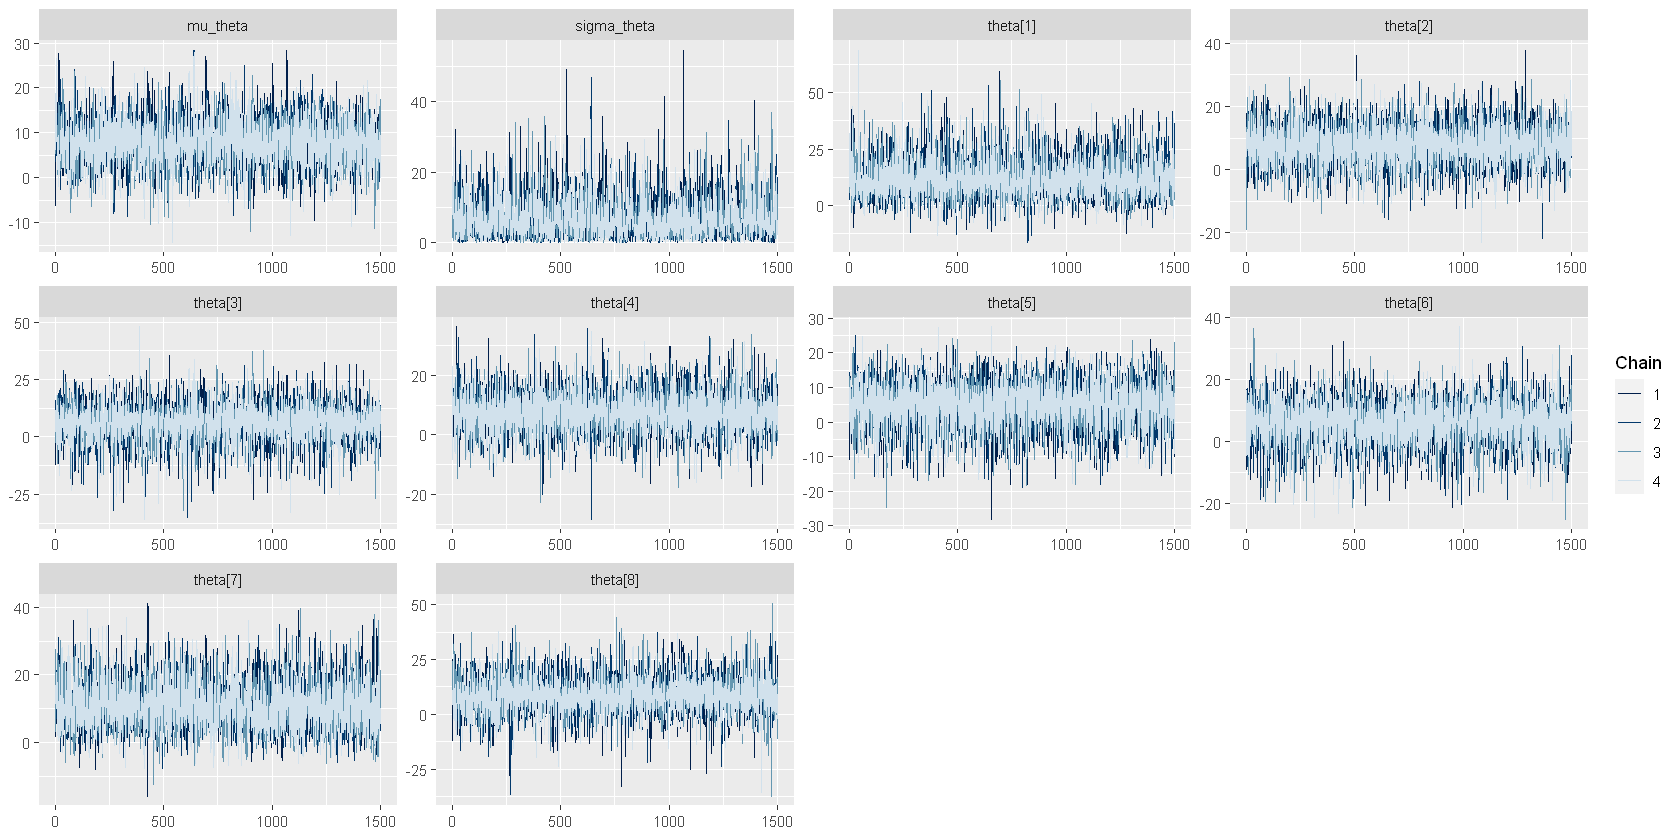

In [31]:
options(repr.plot.width=14,repr.plot.height=7)
mcmc_trace(schools.Stan.01.stanFit,regex_pars=c("theta"))

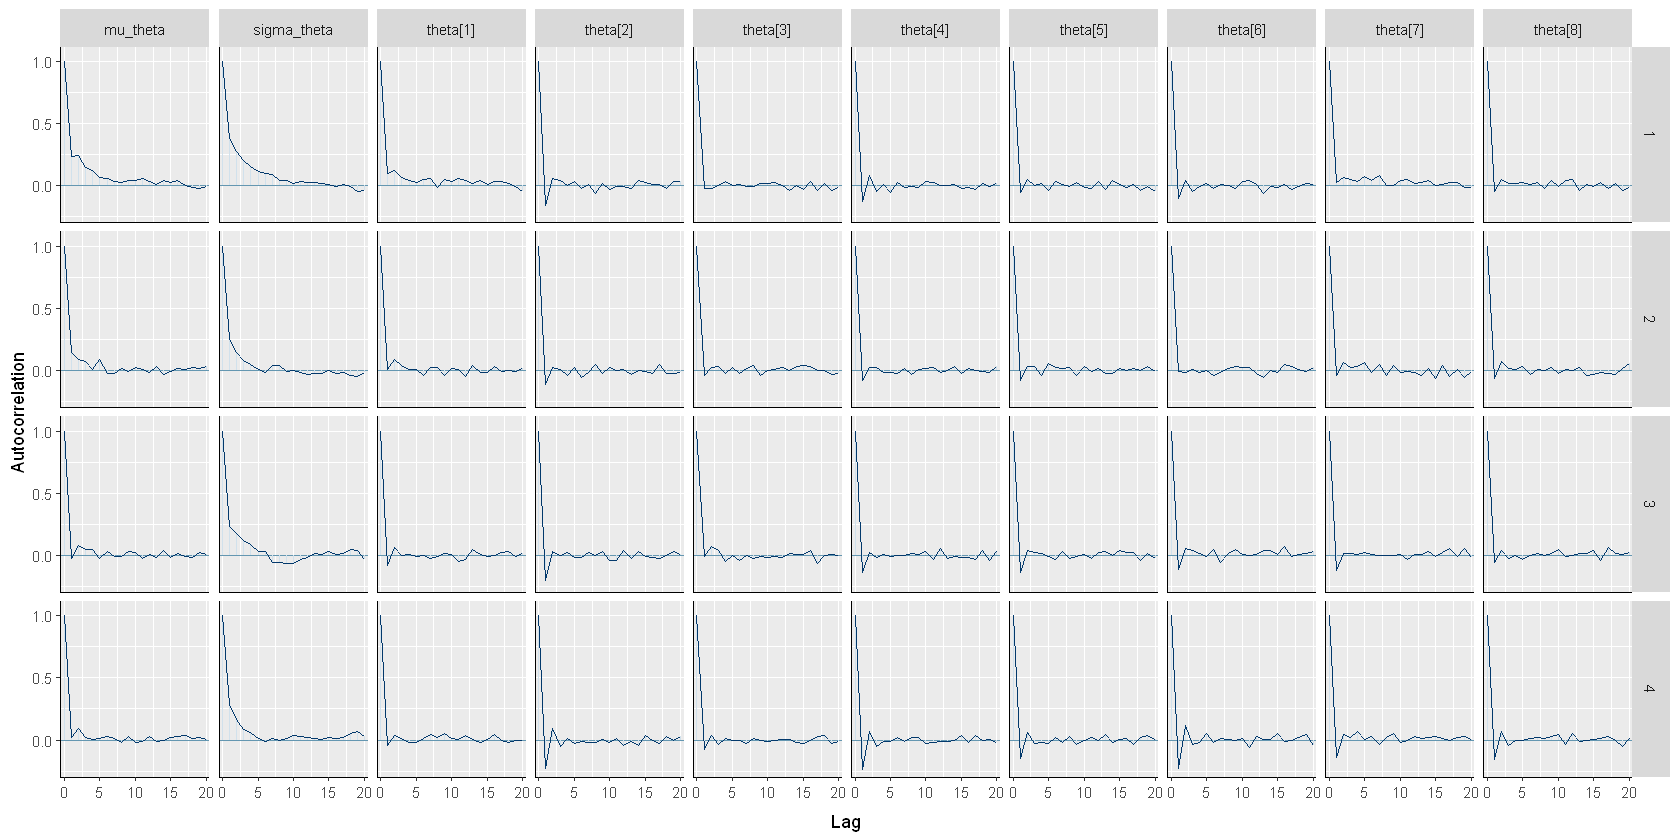

In [32]:
options(repr.plot.width=14,repr.plot.height=7)
mcmc_acf(schools.Stan.01.stanFit,regex_pars=c("theta"))

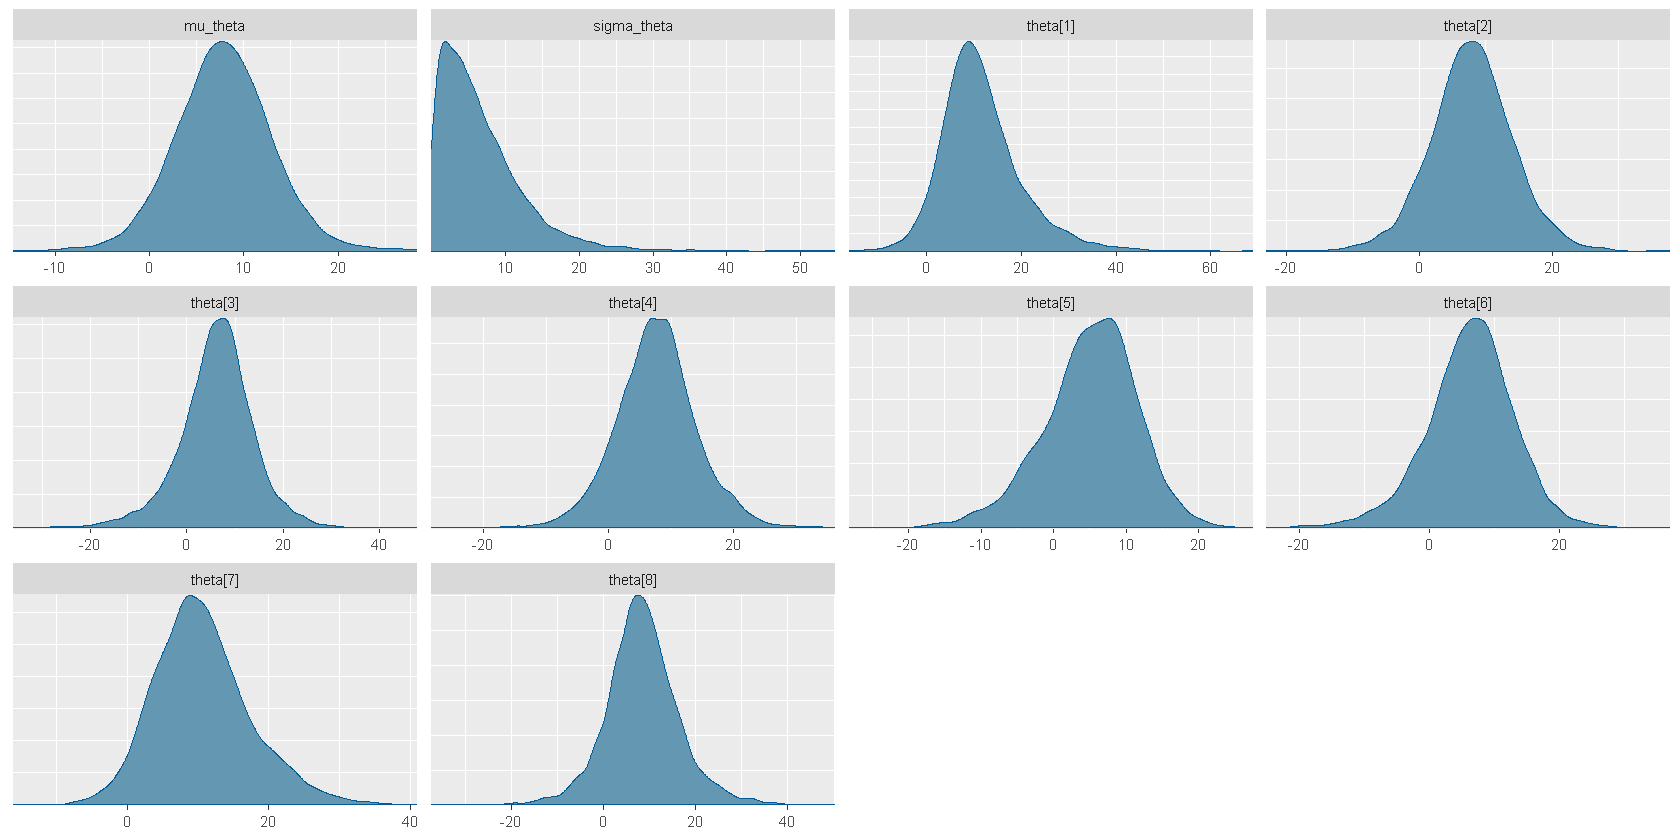

In [33]:
options(repr.plot.width=14,repr.plot.height=7)
mcmc_dens(schools.Stan.01.stanFit,regex_pars=c("theta"))

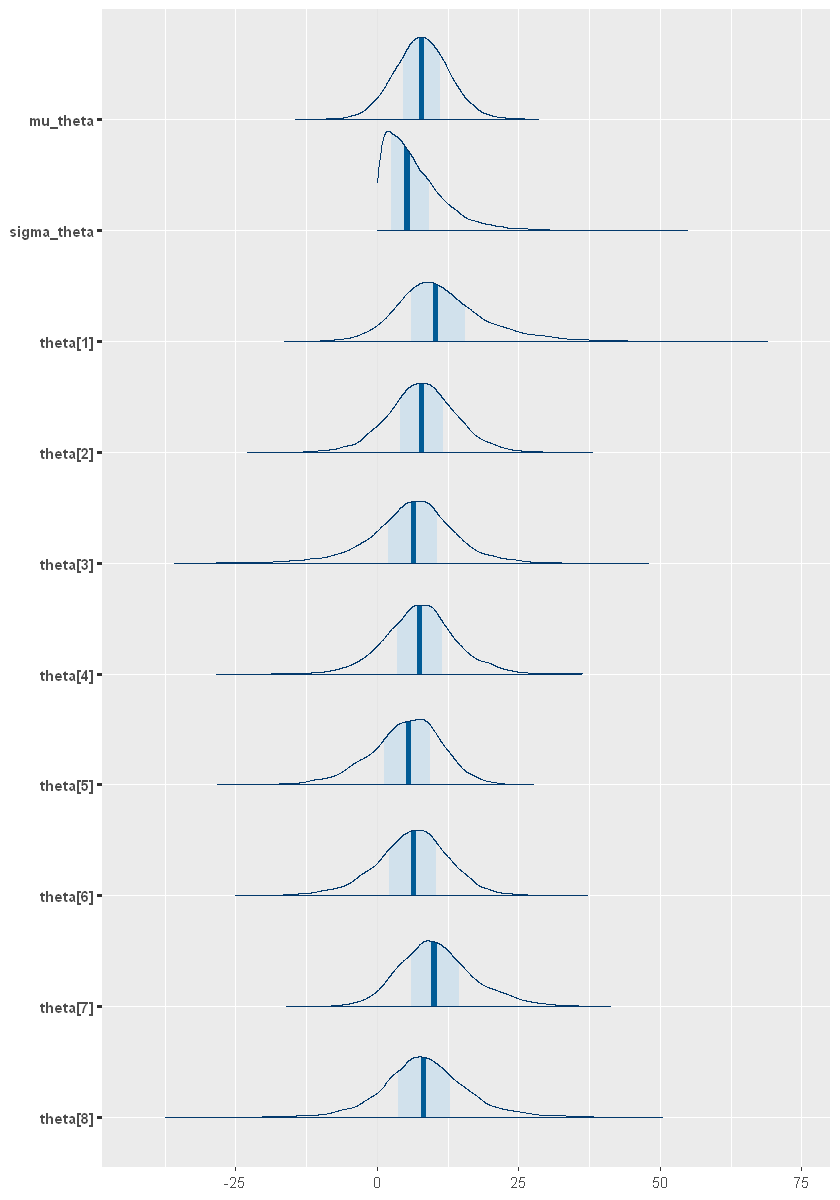

In [34]:
options(repr.plot.width=7,repr.plot.height=10)
mcmc_areas(schools.Stan.01.stanFit,regex_pars=c("theta"))

# Using Stan (a second model, with varying standard deviation in $\eta_{i}$)

In [35]:
#install.packages("ggplot2",dependencies=TRUE,repos= "https://cloud.r-project.org")
#install.packages("StanHeaders",dependencies=TRUE,repos= "https://cloud.r-project.org")
#install.packages("rstan",dependencies=TRUE,repos= "https://cloud.r-project.org")
require(rstan)
options(mc.cores = parallel::detectCores())
rstan_options("auto_write" = TRUE)

In [36]:
#install.packages("bayesplot",dependencies=TRUE,repos="https://cloud.r-project.org")
require(bayesplot)

## Data

In [37]:
J <- 8
y <- c(28,  8, -3,  7, -1,  1, 18, 12)
s <- c(15, 10, 16, 11,  9, 11, 10, 18)

## Stan model 02


1. The observed scores $y_{i}$ (`y[i]`) are drawn from normal distributions with means $\theta_{i}$ (`theta[i]`) and standard deviations $\sigma_{i}$, 

2. Each $i$-th school's individual effect $\theta_{i}$ (`theta[i]`) is drawn from a normal distribution with with mean equal to $\mu_{\theta}$ (`mu_theta`) and standard deviation $\sigma_{\theta}$ (`sigma_theta`), 

>**NB:** Again $\theta_{i}$ is reparameterized $\theta_{i}=\mu_{\theta}+\sigma_{\theta}\cdot\eta_{i}$,   
but now $\eta_{i}\sim\operatorname{Normal}(0,\sigma_{\eta})$ and $\sigma_{\eta}\sim\invgammadist(1,1)$.

1. The mean training effect $\mu_{\theta}$ (`mu_theta`) is drawn from a noninformative zero mean normal distribution, with a large variance $=1.0\times 10^{6}$, 

2. The standard deviation $\sigma_{\theta}$ (`sigma_theta`) of the distribution of individual effects is drawn from a uniform distribution on a large (positive) interval,


$$
    \begin{array}{lcl}
            y_{i}                 &\sim &\operatorname{Normal}(\theta_{i},\sigma_{i}),\mskip30mu 1\leq i\leq J,\\[0.35cm]
            \theta_{i}            &\sim &\operatorname{Normal}(\mu_{\theta},\sigma_{\theta}),
                                    \mskip30mu 1\leq i\leq J,\\[0.35cm]
                                  &&\text{actually,}\\[0.35cm]
             \theta_{i}           &=     &\mu_{\theta}+\sigma_{\theta}\cdot\eta_{i},\mskip30mu\text{where}\\[0.35cm]
                    \eta_{i}&\sim &\operatorname{Normal}(0,\sigma_{\eta}),\mskip30mu 1\leq i\leq J,\\[0.35cm]
                    \sigma_{\eta} &\sim &\invgammadist(1,1),\\[0.35cm]
            \mu_{\theta}   &\sim  &\operatorname{Normal}(0,1000),\\[0.35cm]
            \sigma_{\theta}&\sim  &\operatorname{Unif}(0,1000).
    \end{array}
$$

Notice that, in addition to the `parameters` statement, there is a `transformed parameters` statement, with the obvious meaning.

No explicit prior is given to $\sigma_{\theta}$, $\mu_{\theta}$, assuming Stan will provide noninformative ones.

In [38]:
schools.Stan.02.model<-"
    data{
        int<lower=0> J;         // number of schools 
        real y[J];              // estimated treatment effects
        real<lower=0> sigma[J]; // s.e. of effect estimates 
        }
    parameters{
        real mu_theta; 
        real<lower=0> sigma_eta; 
        real<lower=0,upper=1000> sigma_theta;
        real eta[J];
        }
    transformed parameters{
        real theta[J];
        for (j in 1:J)
            theta[j] = mu_theta + sigma_theta * eta[j];
        }
    model{
        eta ~ normal(0, sigma_eta);           // vectorization allowed
        y ~ normal(theta, sigma);
        mu_theta ~ normal(0,1000);
        sigma_theta ~ uniform(0,1000);
        sigma_eta ~ inv_gamma(1,1);
        }
    " 

### Translate model to C++ and compile to _Dynamic Shared Object (DSO)_

In [39]:
schools.Stan.02.stanDso<-stan_model(model_code=schools.Stan.02.model)

### Generate posterior sample

In [40]:
schools.Stan.02.data<-list(J=J,y=y,sigma=s)

In [41]:
schools.Stan.02.stanFit<-sampling(
        object=schools.Stan.02.stanDso, 
        data = schools.Stan.02.data, 
        chains = 4,
        iter = 15000, 
        warmup = 5000, 
        thin = 1,
        control = list(max_treedepth=20,adapt_delta = 0.998)
        )

Warning message:
"There were 2 chains where the estimated Bayesian Fraction of Missing Information was low. See
https://mc-stan.org/misc/warnings.html#bfmi-low"
Warning message:
"Examine the pairs() plot to diagnose sampling problems
"


In [42]:
schools.Stan.02.summary<-summary(schools.Stan.02.stanFit, probs=c(0.025,0.975))
Stan.02.S<-schools.Stan.02.summary$summary
round(Stan.02.S,3)

,mean,se_mean,sd,2.5%,97.5%,n_eff,Rhat
mu_theta,7.850,0.063,5.109,-2.142,17.821,6625.991,1.000
sigma_eta,1.040,0.085,2.617,0.178,4.289,943.505,1.002
sigma_theta,13.013,0.339,15.852,0.231,56.923,2190.050,1.002
eta[1],0.414,0.016,2.794,-1.631,3.394,29054.154,1.000
eta[2],0.010,0.013,2.312,-2.174,2.232,34111.360,1.000
eta[3],-0.195,0.018,2.694,-2.765,1.940,23158.259,1.000
eta[4],-0.044,0.011,2.320,-2.403,2.188,46737.209,1.000
eta[5],-0.354,0.034,2.388,-3.033,1.564,5065.886,1.001
eta[6],-0.230,0.015,2.750,-2.798,1.804,35447.993,1.000
eta[7],0.358,0.022,2.963,-1.620,3.161,18333.724,1.000


In [43]:
Stan.02.theta.mean<-Stan.02.S[12:19,1]
rbind(y=y,theta.01=round(Stan.01.theta.mean,2),theta.02=round(Stan.02.theta.mean,2))

,theta[1],theta[2],theta[3],theta[4],theta[5],theta[6],theta[7],theta[8]
y,28.00,8.00,-3.00,7.00,-1.00,1.00,18.00,12.00
theta.01,11.45,7.87,6.10,7.61,5.04,6.18,10.66,8.38
theta.02,11.35,7.86,6.14,7.56,5.12,6.09,10.59,8.45


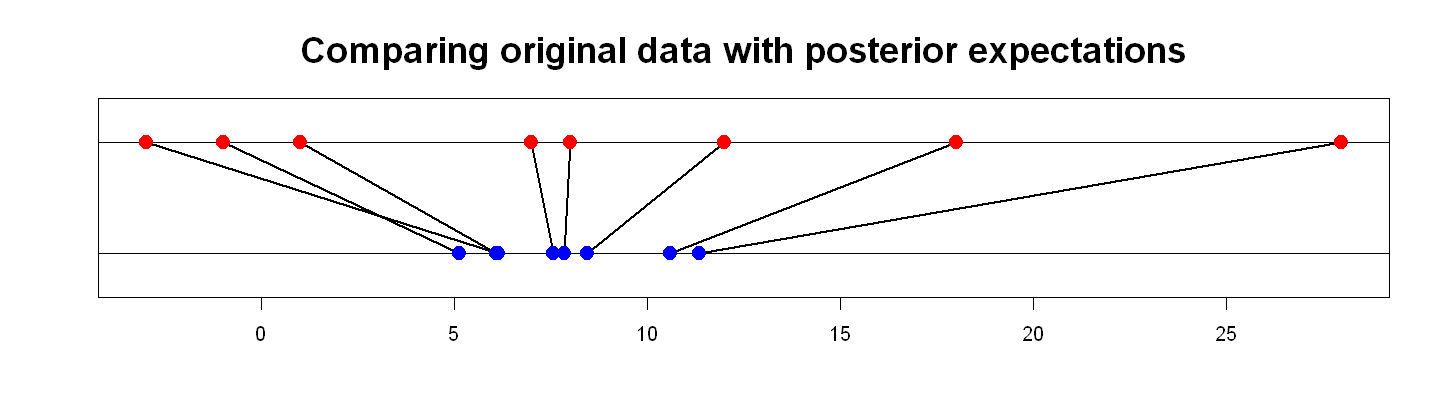

In [44]:
E<-y
F<-Stan.02.theta.mean
x.min<-min(c(E,F))
x.max<-max(c(E,F))
u<-sort(c(E,F))
z<-rep(0,length(u))
h0<-0.3
h1<--h0
z0<-rep(h0,length(E))
z1<-rep(h1,length(F))
options(repr.plot.width=12,repr.plot.height=3.5)
plot(u,z,"p",pch=19,col="white",ylim=c(-0.5,0.5),cex=0.2,ylab="",xlab="",yaxt="n",
    main="Comparing original data with posterior expectations",cex.main=1.8 )
for(i in 1:length(y)){
    lines(c(y[i],Stan.02.theta.mean[i]),c(h0,h1),col="black",lwd=2)
    }
abline(h=h0,lwd=0.5,col="black")
abline(h=h1,lwd=0.5,col="black")
points(E,z0,pch=19,col="red",cex=1.6)
points(F,z1,pch=19,col="blue",cex=1.6)

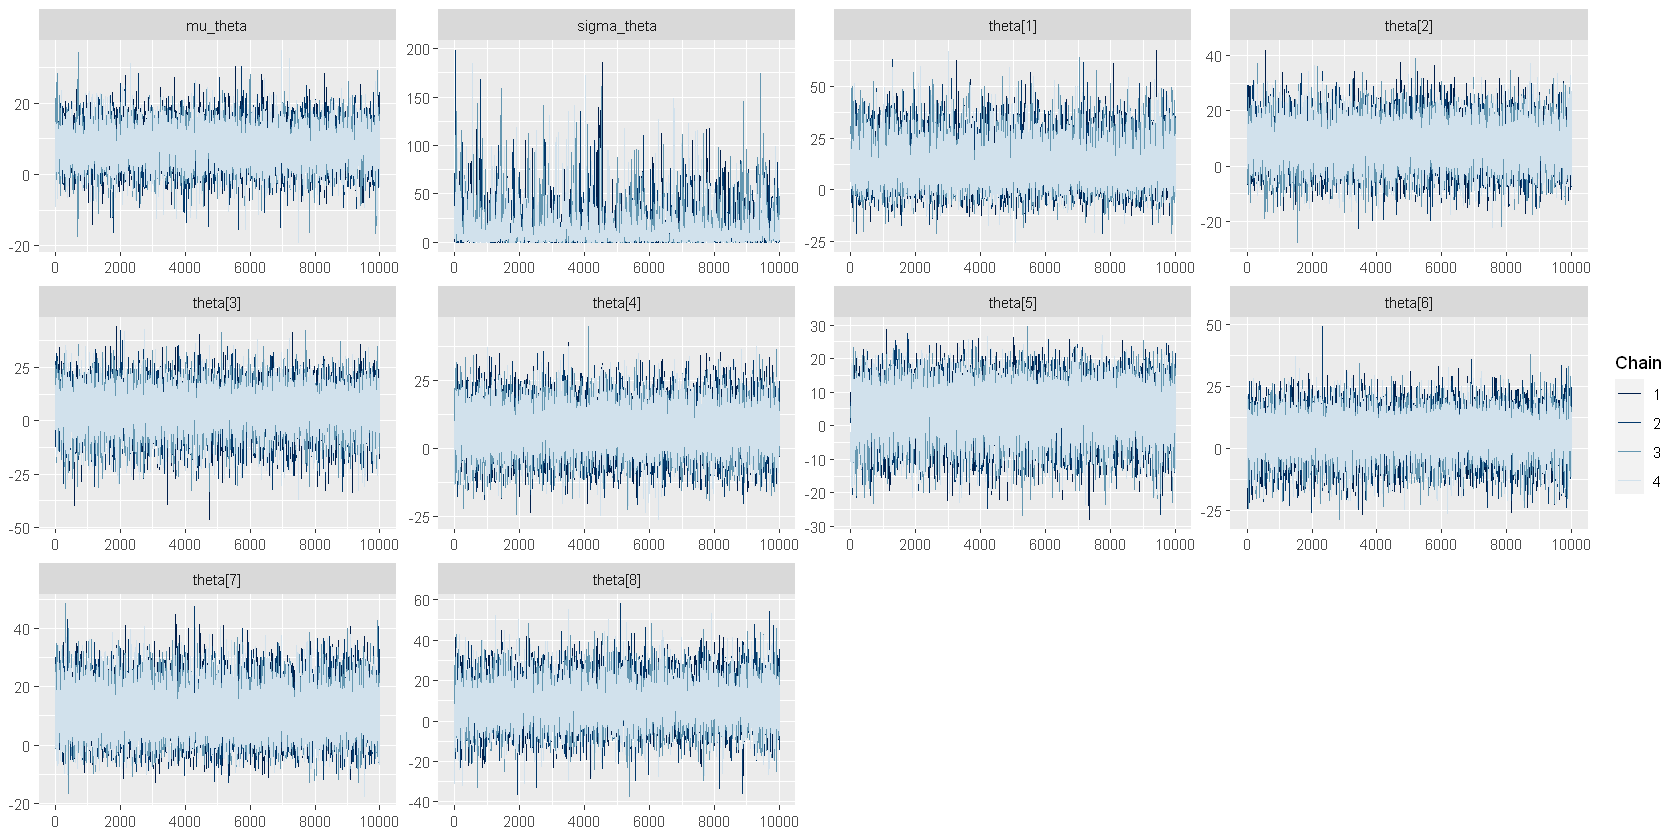

In [45]:
options(repr.plot.width=14,repr.plot.height=7)
mcmc_trace(schools.Stan.02.stanFit,regex_pars=c("theta"))

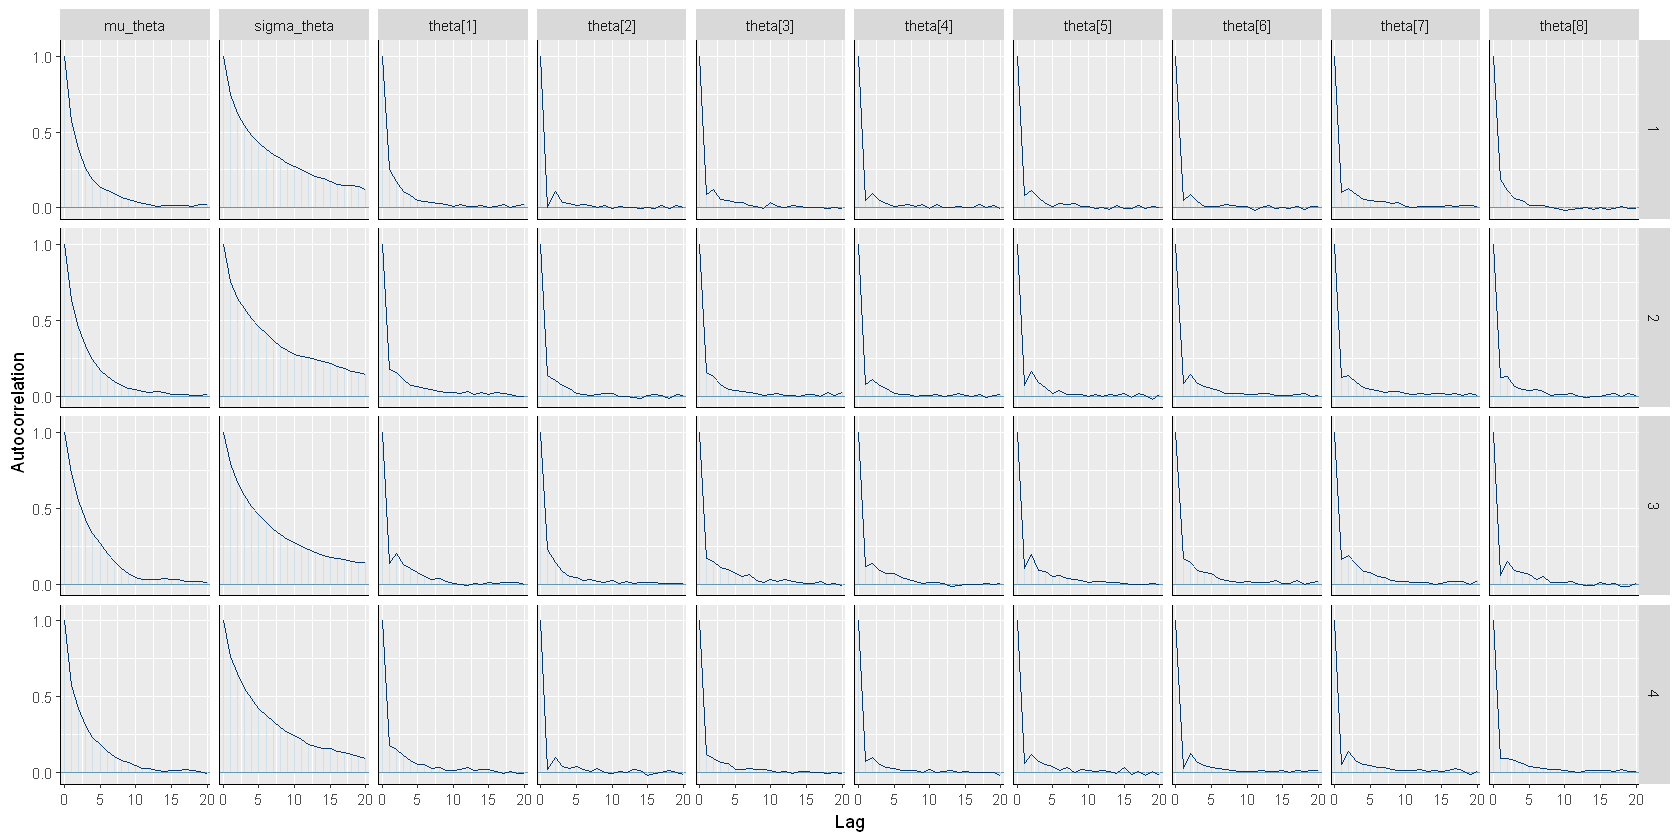

In [46]:
options(repr.plot.width=14,repr.plot.height=7)
mcmc_acf(schools.Stan.02.stanFit,regex_pars=c("theta"))

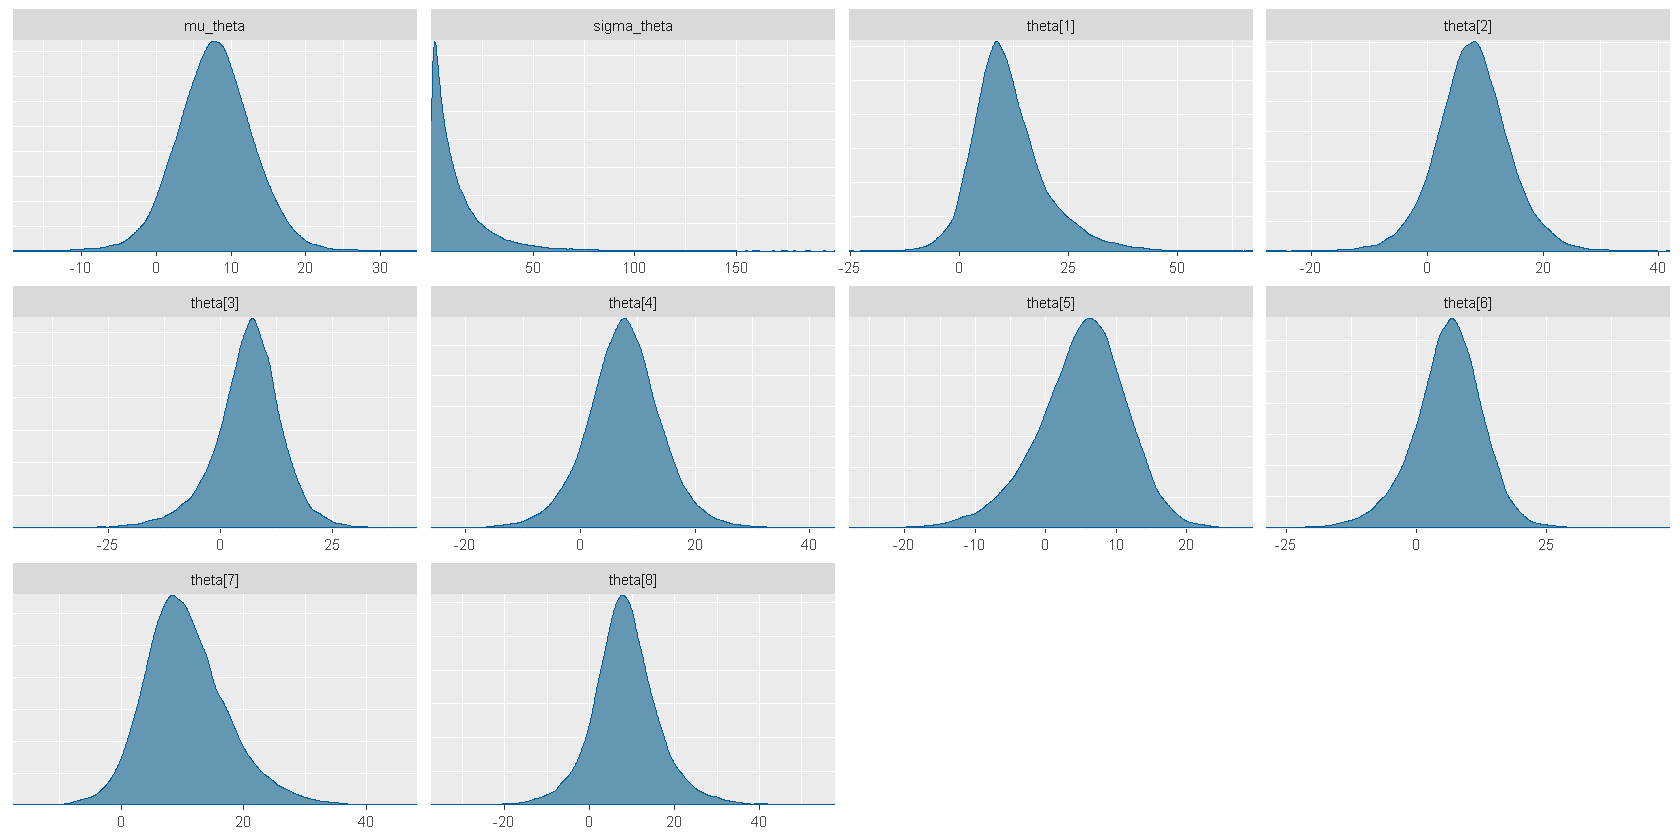

In [47]:
options(repr.plot.width=14,repr.plot.height=7)
mcmc_dens(schools.Stan.02.stanFit,regex_pars=c("theta"))

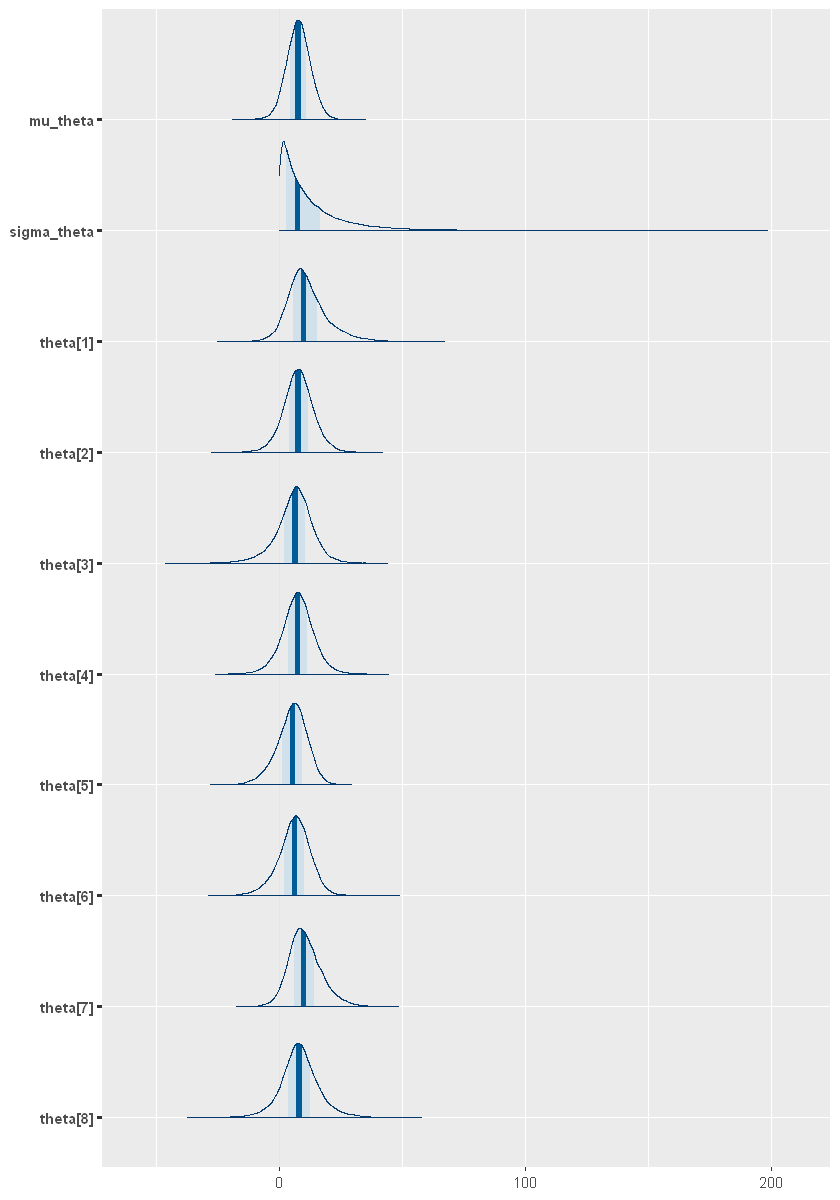

In [48]:
options(repr.plot.width=7,repr.plot.height=10)
mcmc_areas(schools.Stan.02.stanFit,regex_pars=c("theta"))